## 複数の説明変数を持つモデル

複数の説明変数を持っていても、正規線形モデルと言う枠組みで統一的な分析と解析・予測が可能です。分散分析においては、TypeII　ANOVAと呼ばれる検定手法の解説も行います。複数の説明変数があった場合に、それらの変数の有意性をどのように判定するのかを学びます。

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3
%matplotlib inline


In [3]:
sales = pd.read_csv('5-3-1-lm-model.csv')
print(sales.head(3))

   humidity  price  sales  temperature weather
0      29.5    290  229.7         17.8   rainy
1      38.1    290  206.1         26.1   rainy
2      31.5    290  202.5         22.0   rainy


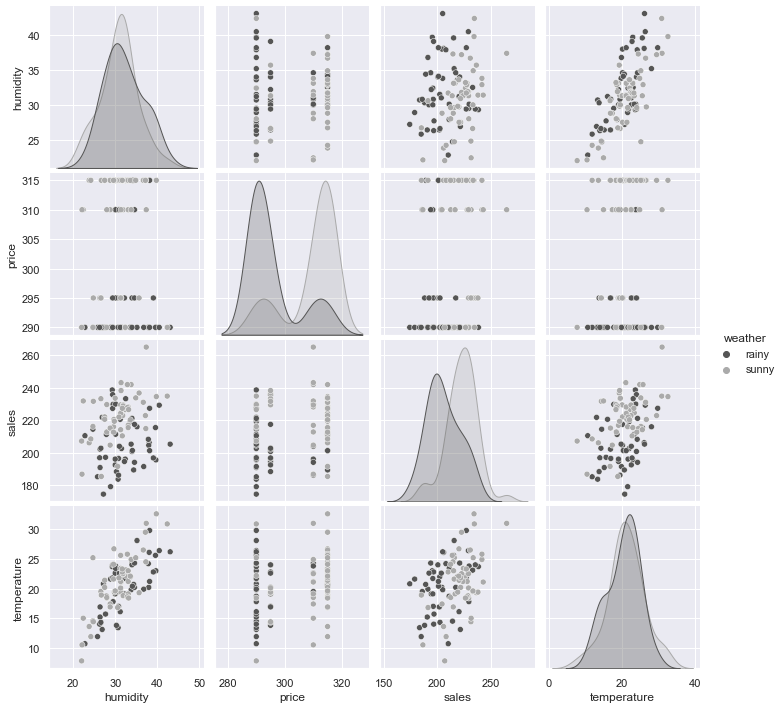

In [5]:
sns.pairplot(data = sales, hue='weather', palette = 'gray')

In [6]:
# １つ変数で応答変数を説明する場合
lm_dame = smf.ols("sales ~ price", sales).fit()
lm_dame .params

Intercept    113.645406
price          0.332812
dtype: float64

In [7]:
print(sm.stats.anova_lm(lm_dame, typ=2))

                sum_sq    df         F    PR(>F)
price      1398.392322   1.0  4.970685  0.028064
Residual  27570.133578  98.0       NaN       NaN


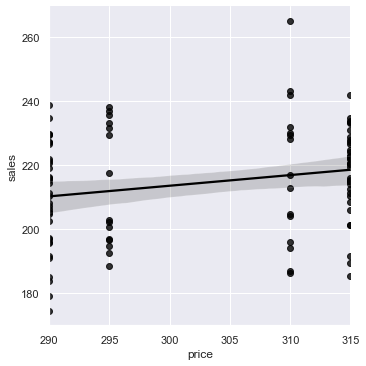

In [8]:
sns.lmplot(x='price', y='sales', data=sales,
          scatter_kws={'color':'black'},
          line_kws={'color':'black'})

In [9]:
print(sales.groupby('weather').mean())

         humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102


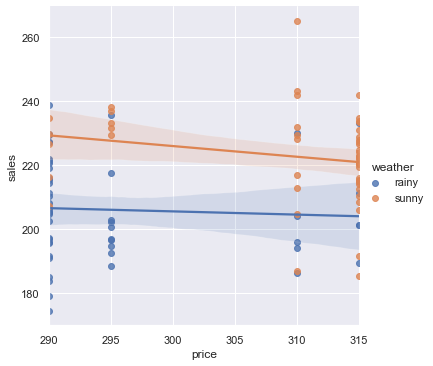

In [11]:
sns.lmplot(x='price', y='sales', data=sales,
           hue='weather')